In [78]:
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy import stats
import matplotlib.pyplot as plt

In [102]:
invertabrates = [
    "('Caenorhabditis elegans (PRJNA13758) genes (WBcel235)', 'Roundworm (Caenorhabditis elegans)')",
    "('Drosophila melanogaster (Fruit fly) genes (BDGP6.46)', 'Fruit fly (Drosophila melanogaster)')",
    "('Caenorhabditis briggsae genes', 'Roundworm (Caenorhabditis briggsae)')",
    "('Ciona intestinalis genes', 'Sea Squirt (Ciona intestinalis)')",
    "('Drosophila ananassae genes', 'Fruit fly (Drosophila ananassae)')",
    "('Drosophila simulans genes', 'Fruit fly (Drosophila simulans)')",
    "('Drosophila yakuba genes', 'Fruit fly (Drosophila yakuba)')",
    "('Octopus bimaculoides (California two-spot octopus, UCB-OBI-ISO-001)', 'California two-spot octopus (Octopus bimaculoides)')"
   ]

vertabrates = [
    "('Hagfish genes (Eburgeri_3.2)', 'Inshore hagfish (Eptatretus burgeri)')",
    "('Elephant shark genes (Callorhinchus_milii-6.1.3)', 'Australian ghostshark (Callorhinchus milii)')",
    "('Spotted gar genes (LepOcu1)', 'Spotted gar (Lepisosteus oculatus)')",
    "('Zebrafish genes (GRCz11)', 'Zebrafish (Danio rerio)')",
    "('Atlantic cod genes (gadMor3.0)', 'Cod (Gadus morhua)')",
    "('Coelacanth genes (LatCha1)', 'Coelacanth (Latimeria chalumnae)')",
    "('Tropical clawed frog genes (Xenopus_tropicalis_v9.1)', 'Tropical clawed frog (Xenopus tropicalis)')",
    "('Tuatara genes (ASM311381v1)', 'Tuatara (Sphenodon punctatus)')",
    "('Green anole genes (AnoCar2.0v2)', 'Green anole lizard (Anolis carolinensis)')",
    "('Painted turtle genes (Chrysemys_picta_bellii-3.0.3)', 'Western painted turtle (Chrysemys picta bellii)')",
    "('Zebra finch genes (bTaeGut1_v1.p)', 'Zebra finch (Taeniopygia guttata)')",
    "('Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)', 'Chicken (Gallus gallus)')",
    "('Platypus genes (mOrnAna1.p.v1)', 'Platypus (Ornithorhynchus anatinus)')",
    "('Opossum genes (ASM229v1)', 'Gray short-tailed opossum (Monodelphis domestica)')",
    "('Armadillo genes (Dasnov3.0)', 'Nine-banded armadillo (Dasypus novemcinctus)')",
    "('Cow genes (ARS-UCD1.2)', 'Cow (Bos taurus)')",
    "('Dog genes (ROS_Cfam_1.0)', 'Dog (Canis familiaris)')",
    "('Rabbit genes (OryCun2.0)', 'Rabbit (Oryctolagus cuniculus)')",
    "('Guinea Pig genes (Cavpor3.0)', 'Guinea pig (Cavia porcellus)')",
    "('Rat genes (mRatBN7.2)', 'Norway rat (Rattus norvegicus)')",
    "('Mouse genes (GRCm39)', 'House mouse (Mus musculus)')",
    "('Human genes (GRCh38.p13)', 'Human (Homo sapiens)')",
    "('Human TargetScan', 'Human (Homo sapiens) TargetScan')"
]

In [103]:
df = pd.read_csv("data/Difference Data (site C ).csv")
invertabrates_random = df.loc[df['Species'].isin(invertabrates), 'Random Difference Percent']
vertabrates_random = df.loc[df['Species'].isin(vertabrates), 'Random Difference Percent']

invertabrates_optimal = df.loc[df['Species'].isin(invertabrates), 'Optimal Difference Percent']
vertabrates_optimal = df.loc[df['Species'].isin(vertabrates), 'Optimal Difference Percent']


In [111]:
invertabrates_random_percent = (-invertabrates_random) / (invertabrates_optimal - invertabrates_random )
vertabrates_random_percent = (-vertabrates_random) / (vertabrates_optimal - vertabrates_random )

In [113]:
mannwhitneyu(invertabrates_random_percent, vertabrates_random_percent)

MannwhitneyuResult(statistic=9.0, pvalue=2.433853379348374e-05)

In [114]:
t_statistic, p_value = stats.ttest_ind(invertabrates_random_percent, vertabrates_random_percent)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -4.878778897642362
P-value: 3.552776672530409e-05


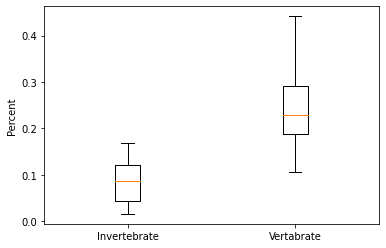

In [ ]:
data_to_plot = [invertabrates_random_percent, vertabrates_random_percent]
plt.boxplot(data_to_plot)
plt.xticks([1, 2], ['Invertebrate', 'Vertabrate']) # Labels for the x-axis
plt.ylabel('Percent')
plt.show()